# Problem 1
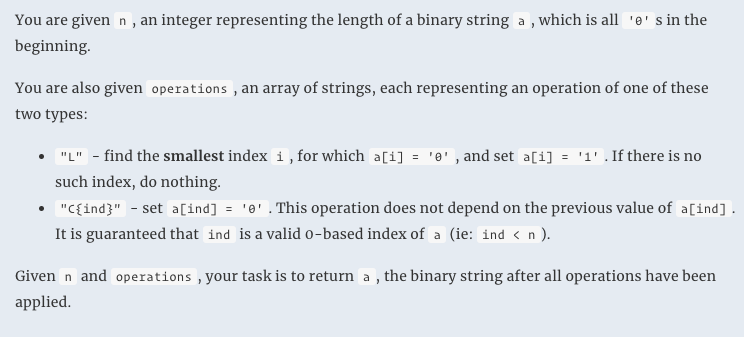
[source](https://leetcode.com/discuss/interview-question/788264/Robinhood-or-OA-New-Grad)

In [18]:
import heapq

def booleanDeque(n, operations):
    zero_idxs = list(range(n))
    heapq.heapify(zero_idxs)
    out = ['0'] * n
    
    for op in operations:
        if op == 'L':
            if len(zero_idxs) <= 0:
                continue
            idx = heapq.heappop(zero_idxs)
            out[idx] = '1'
        elif op[0] == 'C':
            idx = int(op[1:])
            if out[idx] != '0':
                heapq.heappush(zero_idxs, idx)
                out[idx] = '0'
    return ''.join(out)

**Time-Complexity:** $O(k \times \log n)$

**Space:** $O(k)$

$k = operations$

In [20]:
n = 10
operations = "L L C0 L C3".split(" ")
print(booleanDeque(n, operations))

n = 2
operations = "L L L C1".split(" ")
print(booleanDeque(n, operations))

1100000000
10


# Problem 2
For the given string `s`, and the array of strings `a`, `s` is said to be a prefix-string of `a` if it is a concatenation of some prefix of the array `a`, i.e. if there exists some index `i` such that `s = a[0] + a[1] + ... + a[i]`. For example, for `a = ["one", "two", "three"]` strings `s = "one"` and `s = "onetwo"` are *prefix-strings*, while `s = "two"`, `s = "onetw"` and `s = "onethree"` are not.

Given two arrays of strings `a` and `b`, your task is to determine whether all the given strings in `b` are *prefix-strings* of `a`.

### Example
* For `a = ["one", "two", "three"]` and `b = ["onetwo", "one"]` the output should be `prefixStrings(a, b) = true`. Both of the strings `b[0] ="onetwo"` and `b[1] = "one"` are prefix strings of `a`.
* For `a = ["One", "TwoThree", "Four"]` and `b = ["One", "OneTwo"]` the output should be `prefixStrings(a,b) = false`. The second string `b[1] = "OneTwo"` is not a *prefix-string* of `a`, since it doesn't fully match the concatenated elements of `a` (`"OneTwoThree"` would be fine, but `"OneTwo"` is incomplete")
* For `a = ["One", "Two", "Three"]` and `b = ["Two"]` the output should be `prefixStrings(a,b) = false`. 

[source](https://leetcode.com/discuss/interview-question/810159/Robinhood-SDE-new-grad-2021-Q3)

In [24]:
from itertools import accumulate

def prefixStrings(a, b):
    prefix_strings = set()
    accum = ''
    for x in a:
        accum += x
        prefix_strings.add(accum)
    return len(set(b) - prefix_strings) == 0
        

**Time-Complexity:** $O(n)$

**Space:** $O(n)$

$n = \max(a,b)$

In [28]:
print(prefixStrings(["one", "two", "three"], ["onetwo", "one"]))
print(prefixStrings(["One", "TwoThree", "Four"], ["One", "OneTwo"]))
print(prefixStrings(["One", "TwoThree", "Four"], ["One", "OneTwo"]))
print(prefixStrings(["One", "TwoThree", "Four"], ["One", "OneTwoThree"]))

True
False
False
True


# Problem 3
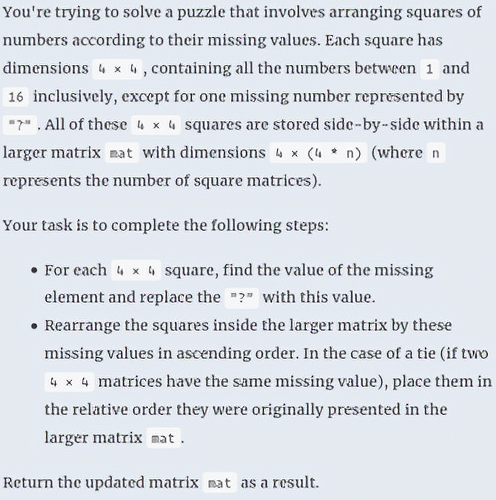
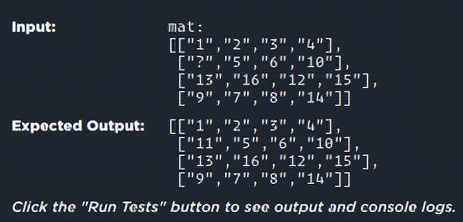

In [108]:
sum_of_sequence = ((16)*(16 + 1))//2

def find_missing_value(mat, x_offset=0):
    missing_number = sum_of_sequence
    q_pos = None
    for x in range(x_offset, x_offset + 4):
        for y in range(0, 4):
            if mat[y][x] == '?':
                q_pos = (x, y)
                continue
            missing_number -= int(mat[y][x])
    return missing_number, q_pos

def sort_by_missing(mat):
    array_order = []
    new_mat = [ r.copy() for r in mat ]
    for x_offset in range(0, len(mat[0]), 4):
        val, (x, y) = find_missing_value(mat, x_offset)
        mat[y][x] = str(val)
        array_order.append((val, x_offset // 4))
    array_order.sort(key=lambda x: x[0])
    for i, (_, old_i) in enumerate(array_order):
        if i == old_i:
            continue
        x, x_e = i * 4, (x + 1) * 4
        ox, ox_e = old_i * 4, (old_i + 1) * 4
        for new_row, old_row in zip(new_mat, mat):
            new_row[x:x_e] = old_row[ox:ox_e]
    return new_mat
            

In [109]:
m = [
    ["1", "2", "3", "4"],
    ["?", "5", "6", "10"],
    ["13", "16", "12", "15"],
    ["9", "7", "8", "14"]
]
print(f'Missing {find_mising_value(m)}')

m = [
    ["14", "3", "10", "4", "16", "10", "?", "2", "?", "9", "15", "11"],
    ["16", "7", "8", "2", "1", "4", "8", "3", "3", "16", "7", "13"],
    ["?", "9", "6", "5", "14", "12", "7", "6", "2", "10", "4", "14"],
    ["15", "1", "13", "12", "9", "15", "5", "13", "1", "8", "12", "6"]
]
print('\n'.join([' '.join(r) for r in sort_by_missing(m)]))

Missing 11
5 9 15 11 14 3 10 4 16 10 11 2
3 16 7 13 16 7 8 2 1 4 8 3
2 10 4 14 11 9 6 5 14 12 7 6
1 8 12 6 15 1 13 12 9 15 5 13
